# DS2-Exam-IE594-Spring2020

Name:Marco
Last Name:Ragone
UIN:663753752  

Use historical loan application data to predict whether or not an applicant will be able to repay a loan.
The label is a binary variable “TARGET”, indicating 0: the loan was repaid or 1: the loan was not repaid; indicating bad/good applicant.

The dataset contains applicants demographic information, financial status, and also some credit ratings from external sources.

The goal is to predict whether or not an applicant will repay the loan. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#import necessary libraries here:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.initializers import Zeros,RandomNormal,he_normal
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [2]:
#load the dataset
data = pd.read_csv('application_train.csv')
df = data.copy()

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# features names

columns = df.columns
for col in columns:
    print (col)


SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

### 1. Check the distribution of data points for each class label and  plot the histogram.

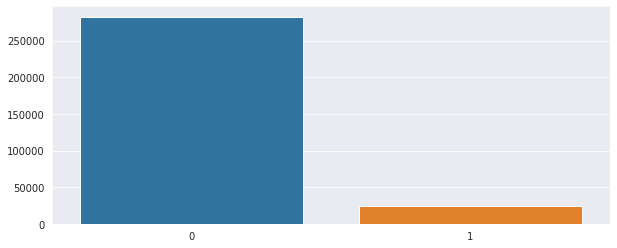

In [4]:
#write your code here
target = df.TARGET.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=target.index, y=target.values)
plt.show()

In [5]:
repaid_loans=target.values[0]
not_repaid_loans=target.values[1]


print('repaid loans: {}'.format(repaid_loans))
print('not repaid loans: {}'.format(not_repaid_loans))

repaid loans: 282686
not repaid loans: 24825


As the distribution reveals, there are more than times repaid loans than not repaid loans. So class 0 is much more populated compared to class 1.

### 2. Identify the number of features.

In [6]:
#write your code here

n_features=len(df.columns)-2

print('number of features: {}'.format(n_features))

number of features: 120


The number of features is equal to the number of columns in the dataset reduced by 2, where 2 counts for the label (variable: 'TARGET') and the customer ID which is not a feature

In [7]:
#set index to SK_ID_CURR which is the customer ID
df = df.set_index('SK_ID_CURR')

In [8]:
#Explore outlier observations in the data.

df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

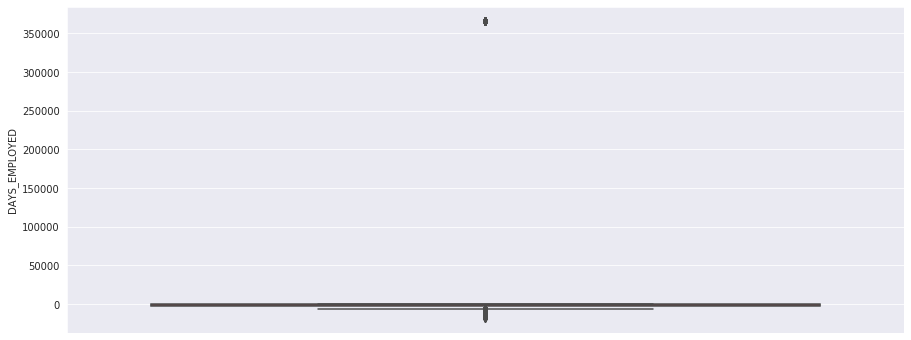

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df["DAYS_EMPLOYED"], color="red")

### 3. How do you interprete the table above? What is the anomaly value for this attribute? plug in the anomaly value in the cell below '?' to replace it with NAN .

From the box plot it is evident that sample with positive values of 'DAYS_EMPLOYED' are outlier, causing a huge value of the standard deviation and a 'crushed' outlook of the box plot.

In [10]:
DAYS_EMPLOYED=df["DAYS_EMPLOYED"].iloc[:].values
POSITIVE_DAYS_EMPLOYED_INDEX=np.where(DAYS_EMPLOYED>0)[0]
POSITIVE_DAYS_EMPLOYED_VALUES=DAYS_EMPLOYED[POSITIVE_DAYS_EMPLOYED_INDEX]
np.unique(POSITIVE_DAYS_EMPLOYED_VALUES)

print('% positive DAYS_EMPLOYED: {}'.format(len(POSITIVE_DAYS_EMPLOYED_INDEX)/len(DAYS_EMPLOYED)*100))

% positive DAYS_EMPLOYED: 18.00716071945394


In [11]:
DAYS_EMPLOYED=df["DAYS_EMPLOYED"].iloc[:].values
POSITIVE_DAYS_EMPLOYED_INDEX=np.where(DAYS_EMPLOYED>0)[0]
POSITIVE_DAYS_EMPLOYED_VALUES=DAYS_EMPLOYED[POSITIVE_DAYS_EMPLOYED_INDEX]
print('unique and anomaly value of positive DAYS EMPLOYED: {}'.format(np.unique(POSITIVE_DAYS_EMPLOYED_VALUES)))

unique and anomaly value of positive DAYS EMPLOYED: [365243]


From the analysis above it results that there are 18% of outliers (samples with positive values of 'DAYS_EMPLOYED' and all of this outliers have exactly the same value of 365243. So these samples are cleary anomalous.

The DAYS_EMPLOYED features refers to how many days before the application for the loan the person started to be employed. So negative values refers to how many days before being emplyed the person applied for the loan. Ex: 

- DAYS_EMPLOYED=-100 >>> the person started to be employed 100 days after applying for the loan

The statistics of the negative values are shown in the cell below:

In [12]:
df[df['DAYS_EMPLOYED']<=0]['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

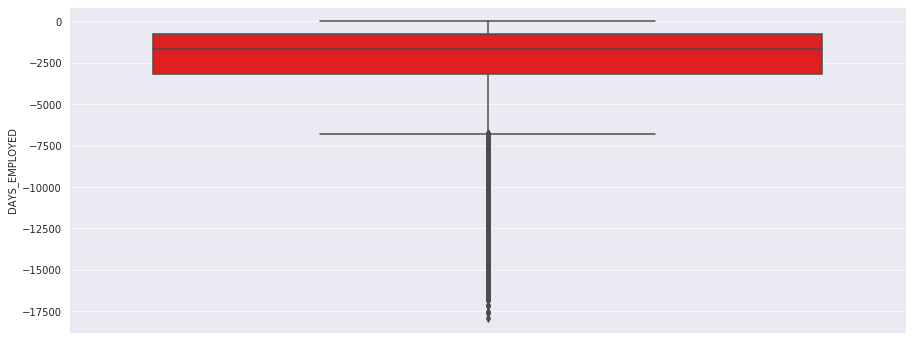

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df[df['DAYS_EMPLOYED']<=0]['DAYS_EMPLOYED'], color="red")

25% of the data points have values below the first quantile Q1=-3175
75% of the data points have values below the third quantile Q3=-767
50% of the data points have values ranging between Q3 and Q1 (red region) with a median of -1648 and a standard deviation of 2338.36

From this box plot it can be seen that also in the data points with negative values of DAYS_EMPLOYED there are some outliers. The outliers are the data points for which DAYS_EMPLOYED fall between the minimum (-17912 days) and a value known as the 1.5IQR (IQR: InterQuantileRange) below the First Quantile (-3175~25%)

First quantile Q1=-3175
Third quantile Q3= -767
IQR= Q3-Q1=2408
1.5IQR below first quantile=Q1-1.5IQR=-3175-1.5x2408=-6787

So the ouliers are the data points with values between -6787 and -17912


In [14]:
NEGATIVE_DAYS_EMPLOYED_INDEX=np.where(DAYS_EMPLOYED<=0)[0]
NEGATIVE_DAYS_EMPLOYED_VALUES=DAYS_EMPLOYED[NEGATIVE_DAYS_EMPLOYED_INDEX]

OUTLIERS=len(np.where(NEGATIVE_DAYS_EMPLOYED_VALUES<-6787)[0])

print('number of samples with negative values of DAYS_EMPLOYED: {}'.format(len(NEGATIVE_DAYS_EMPLOYED_INDEX)))
print('')
print('% of samples with negative values of DAYS_EMPLOYED: {} %'.format(len(NEGATIVE_DAYS_EMPLOYED_INDEX)/len(DAYS_EMPLOYED)*100))
print('')
print('number of outliers in the samples with negative values of DAYS_EMPLOYED: {}'.format(OUTLIERS))
print('')
print('% of outliers in the samples with negative values of DAYS_EMPLOYED: {} %'.format(OUTLIERS/len(NEGATIVE_DAYS_EMPLOYED_VALUES)*100))


number of samples with negative values of DAYS_EMPLOYED: 252137

% of samples with negative values of DAYS_EMPLOYED: 81.99283928054606 %

number of outliers in the samples with negative values of DAYS_EMPLOYED: 15149

% of outliers in the samples with negative values of DAYS_EMPLOYED: 6.00824155122017 %


Then outliers of the samples distribution with negative values of DAYS_EMPLOYED represent the 6% of the distribution

The data points with anomaly value of DAYS_EMPLOYED (365243) are replaced with NaN

In [15]:
#write your code here
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

In [16]:
#Convert the columns to float and the days columns to year. 
#We call the new columns as YEARS_BIRTH,... and remove the days columns.
df['DAYS_BIRTH'] = [float(-x//365)  for x in df.DAYS_BIRTH]
df['DAYS_EMPLOYED'] = [float(-x//365)  for x in df.DAYS_EMPLOYED]
df['DAYS_REGISTRATION'] = [float(-x//365)  for x in df.DAYS_REGISTRATION]
df['DAYS_ID_PUBLISH'] = [float(-x//365)  for x in df.DAYS_ID_PUBLISH]
df = df.rename(columns = {'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED', 'DAYS_REGISTRATION': 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH', })


### 4. Create bins of ['young adults', 'adults', 'seniors'] for YEARS_BIRTH with [19., 36., 53., 70.] border ages and remove YEARS_BIRTH column.

In [17]:
bins=['young_adults','adults','seniors']

YEARS_BIRTH=df.YEARS_BIRTH

df=df.drop(['YEARS_BIRTH'],axis=1)

AGE_BINS=pd.cut(YEARS_BIRTH,[19,36,53,70],labels=bins)

df=pd.concat([df,pd.DataFrame(AGE_BINS)],axis=1)

df=df.rename(columns={'YEARS_BIRTH':'AGE_BINS'})

In [18]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_BINS
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,young_adults
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,adults
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,adults
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,adults
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,seniors


### 5. Fill the missing values for our float variables with the median of the non-missing values for each feature


In [19]:
float_features=df.select_dtypes(include=['float64']).columns

In [20]:
df[float_features].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,202500.0,406597.5,24700.5,351000.0,0.018801,1.0,9.0,5.0,NaN,1.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,3.0,3.0,0.0,NaN,2.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,67500.0,135000.0,6750.0,135000.0,0.010032,0.0,11.0,6.0,26.0,1.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,135000.0,312682.5,29686.5,297000.0,0.008019,8.0,26.0,6.0,NaN,2.0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
100007,121500.0,513000.0,21865.5,513000.0,0.028663,8.0,11.0,9.0,NaN,1.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#write your code here

df[float_features]=df[float_features].fillna(df[float_features].median(), inplace=True)

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_BINS
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,None,None,None,None,...,0,0,0,None,None,None,None,None,None,young_adults
100003,0,Cash loans,F,N,N,0,None,None,None,None,...,0,0,0,None,None,None,None,None,None,adults
100004,0,Revolving loans,M,Y,Y,0,None,None,None,None,...,0,0,0,None,None,None,None,None,None,adults
100006,0,Cash loans,F,N,Y,0,None,None,None,None,...,0,0,0,None,None,None,None,None,None,adults
100007,0,Cash loans,M,N,Y,0,None,None,None,None,...,0,0,0,None,None,None,None,None,None,seniors


### 6. Create dummy variables.

In [22]:
#write your code here

df=pd.get_dummies(df,drop_first=True)

df.head()

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,AGE_BINS_adults,AGE_BINS_seniors
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,1,0,1,1,0,2,2,...,0,0,0,0,0,1,0,0,0,0
100003,0,0,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
100004,0,0,1,1,1,1,1,0,2,2,...,0,0,0,0,0,0,0,0,1,0
100006,0,0,1,1,0,1,0,0,2,2,...,0,0,0,0,0,0,0,0,1,0
100007,0,0,1,1,0,1,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1


### 7. Standardize the columns to be in the range of (0,1).

In [23]:
#write your code here
df_normalized=(df-df.min())/(df.max()-df.min())

df_normalized.head()

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,AGE_BINS_adults,AGE_BINS_seniors
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100004,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100006,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100007,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X = df_normalized.drop('TARGET', axis = 1)
Y = df_normalized['TARGET']

### 8. Split training testing dataset using X and Y created in the cell above and split with the test size of 20% and randomstate=12345 and call them X_train, Y_train, X_test, and Y_test.

In [35]:
#write your code here
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=12345)


### 9. Fit a decision tree classifier and explain your choice of hyperparameters. Tune two of the hyperparameters for 3 different values and print the test score for each scenario (total 6 scenarios).

In [26]:
#write your code here

# max_depth tuning

max_depth=[None,10,100]

dt_1=DecisionTreeClassifier(max_depth=max_depth[0])
dt_1.fit(X_train,Y_train)
print('scenario 1: max_depth=None')
print('test performance scenario 1 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_1.predict(X_test))))
print('')
print('')

dt_2=DecisionTreeClassifier(max_depth=max_depth[1])
dt_2.fit(X_train,Y_train)
print('scenario 2: max_depth=10')
print('test performance scenario 2 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_2.predict(X_test))))
print('')
print('')


dt_3=DecisionTreeClassifier(max_depth=max_depth[2])
dt_3.fit(X_train,Y_train)
print('scenario 3: max_depth=100')
print('test performance scenario 3 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_3.predict(X_test))))
print('')
print('')

# min_sample_leaf tuning 
min_samples_leaf=[1,100,1000]

dt_4=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf[0])
dt_4.fit(X_train,Y_train)
print('scenario 4: min_samples_leaf=1')
print('test performance scenario 4 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_4.predict(X_test))))
print('')
print('')

dt_5=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf[1])
dt_5.fit(X_train,Y_train)
print('scenario 5: min_samples_leaf=100')
print('test performance scenario 5 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_5.predict(X_test))))
print('')
print('')


dt_6=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf[2])
dt_6.fit(X_train,Y_train)
print('scenario 6: min_samples_leaf=1000')
print('test performance scenario 6 : ')
print('accuracy: {:.3f}'.format(accuracy_score(Y_test,dt_6.predict(X_test))))
print('')
print('')



                 

                

scenario 1: max_depth=None
test performance scenario 1 : 
accuracy: 0.847


scenario 2: max_depth=10
test performance scenario 2 : 
accuracy: 0.919


scenario 3: max_depth=100
test performance scenario 3 : 
accuracy: 0.847


scenario 4: min_samples_leaf=1
test performance scenario 4 : 
accuracy: 0.847


scenario 5: min_samples_leaf=100
test performance scenario 5 : 
accuracy: 0.920


scenario 6: min_samples_leaf=1000
test performance scenario 6 : 
accuracy: 0.920




### 10. Fit a Randomforest classifier with alpha = [200,500,1000,2000] and max_depth = [7, 10] and print the 5fold cross validation score. 

In [27]:
#write your code here
rf=RandomForestClassifier()

min_samples_split=[200,500,1000,2000]

max_depth=[7,10]

                  

params_dict=[{'min_samples_split':min_samples_split,
             'max_depth': max_depth}]


grid_search_rf=GridSearchCV(estimator=rf,
                       param_grid=params_dict,
                       scoring='accuracy',
                       cv=5,
                        n_jobs=-1)

grid_search_rf.fit(X_train,Y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
print('parameters of the best random forest: ' +str(grid_search_rf.best_params_))
print('')
print('cross validation accuracy: {:.3f}'.format(grid_search_rf.best_score_))

parameters of the best random forest: {'max_depth': 7, 'min_samples_split': 200}

cross validation accuracy: 0.919


### 11. Identify the importance of each variables and list the first 15 important variables.

In [29]:
#write your code here

rf=RandomForestClassifier()

rf.fit(X_train,Y_train)

feature_importances=rf.feature_importances_

sorted_feature_importances=np.sort(feature_importances)[::-1]

top_15_sorted_features_importances=sorted_feature_importances[:15]

print('importance of the 15 most important variables: ')
print(top_15_sorted_features_importances)
print('')

top_15_features_index=np.where(feature_importances>=top_15_sorted_features_importances[14])[0]

top_15_features_names=X.columns[top_15_features_index]

print('names of the 15 most important variables: ')
print('')
for i in range(len(top_15_features_names)):
    print('most important variable {} : {}'.format(i+1,top_15_features_names[i]))


importance of the 15 most important variables: 
[0.13861987 0.04135685 0.03053589 0.02485487 0.02204807 0.02153944
 0.02133609 0.0211187  0.02083713 0.02064868 0.02061144 0.02028471
 0.01926749 0.01895536 0.01771493]

names of the 15 most important variables: 

most important variable 1 : CNT_CHILDREN
most important variable 2 : FLAG_WORK_PHONE
most important variable 3 : FLAG_PHONE
most important variable 4 : HOUR_APPR_PROCESS_START
most important variable 5 : FLAG_OWN_CAR_Y
most important variable 6 : FLAG_OWN_REALTY_Y
most important variable 7 : NAME_FAMILY_STATUS_Married
most important variable 8 : WEEKDAY_APPR_PROCESS_START_MONDAY
most important variable 9 : WEEKDAY_APPR_PROCESS_START_THURSDAY
most important variable 10 : WEEKDAY_APPR_PROCESS_START_TUESDAY
most important variable 11 : WEEKDAY_APPR_PROCESS_START_WEDNESDAY
most important variable 12 : ORGANIZATION_TYPE_Business Entity Type 3
most important variable 13 : FONDKAPREMONT_MODE_reg oper account
most important variable 14 

### 13. Apply a principle component analysis and generate the scree plot for explained variance ratio to decide about the best number of components. Compare it with the initial number of variables.

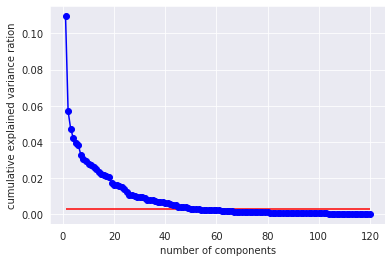

best number of components: 50


In [32]:
#write your code here

pca=PCA(n_components=120)
X_PCA=pca.fit_transform(X)

plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'bo-')
plt.hlines(y=pca.explained_variance_ratio_[50],xmin=1,xmax=120,colors='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance ration')
plt.show()

print('best number of components: {}'.format(50))

In [36]:
print('explained variance ratio using 50 components: {}'.format(pca.explained_variance_ratio_[50]))

explained variance ratio using 50 components: 0.0028350089355235614


From now on, 50 components are used. I moved question 12 after PCA because it is faster fitting SVC on 50 compoents instead on all the features

In [37]:
pca=PCA(n_components=50)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

### 12. Create a svm Classifier and your choice of kernel. Use a 10-fold cross validation to evaluate how well your model performs. Report precision and recall.

In [ ]:
#write your code here

svc=SVC(C=1,kernel='linear')

cross_val_score(estimator=svc, X=X_train,y=Y_train,cv=10,n_jobs=-1)


### 14. Fit a neural network without regularization.

In [30]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu'))
model.add(Dense(units=1,activation='sigmoid'))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 21s 87us/sample - loss: 0.2757 - acc: 0.9183
Epoch 2/5
246008/246008 [==============================] - 21s 87us/sample - loss: 0.2701 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 25s 101us/sample - loss: 0.2694 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 23s 93us/sample - loss: 0.2689 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 2s 38us/sample - loss: 0.2698 - acc: 0.9205

test loss: 0.26979918731884567
test accuracy: 0.9204591512680054


### 15. Which and why did you choose an activation function (Explain advantages and disadvantages of the selected activation function)

- Activation function for fully connected layers: ReLU 'relu'
  
  -Advantages: large and constent gradients and faster convergence repsect to other activation functions. It provides non-linearity to the model.
  
  -Disadvantges: Dead Neurons problem: when the neurons are inactive, the gradient is zero so there is no update. 
  The problem can be solved with optimized linear activations like Leaky ReLU or PReLU
                
                
- Activation function for output layer: Sigmoid 'sigmoid'

  It employs logistic sigmoid function and it is the tipical activation function used in the output layer for binary classification problems together with tanh like the classification of users who paid or did not pay back the loan. It returns values between 0 and 1.
  
  -Advantages: it prevents jumps in the output values, it is capable of clear predictions: negative input are predicted to 0 class and positive inputs are predicted to the 1 class
  
  -Disadvantages: Vanishing gradient: for small inputs, the gradient and thus the update is weak,
  not centered output (when the input is 0, the output is 0.5), high computational cost.




### 16. Explain your choice of cost function.

The used activation function is 'binary_crossentropy'. This is the typical loss function used for binary classification tasks. The formula of Binary Crossentropy is the following:

1/m * sum(m) (-ym * log (ym_hat)-(1-ym) * log (1-ym_hat))

m: number of training data points

sum (m): sum over all the training data points

ym: true value
ym_hat: predicted probability

This type of loss functions infers a low value if the data point is predicted in the correct class and a higher loss if the predicted class is incorrect

Ex.: ym=0 ym_hat=0.1

l = - 0 * log(0.1) - (1-0) * log(1-0.1) = -log (0.9)  ~ 0.1

Ex : ym=0 ym_hat=0.9

l = -0 * log (0.9) - (1-0) * log(1-0.9) ~ -2.3

For this reason, Binary Crossentropy is chosen for classifications tasks, it penalizes incorrectly predicted classes.

### 17. Examin 3 different optimization approach. Discuss the difference in the performance of the training.

In [77]:
#write your code here


#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',kernel_regularizer=l1(0.1),bias_regularizer=l1(0.1)))
model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=l1(0.1),bias_regularizer=l1(0.1)))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))


Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 108s 438us/sample - loss: 0.9912 - acc: 0.9190- loss: 0.9929 - 
Epoch 2/5
246008/246008 [==============================] - 119s 485us/sample - loss: 0.6278 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 120s 488us/sample - loss: 0.6278 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 124s 505us/sample - loss: 0.6276 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 15s 250us/sample - loss: 0.6244 - acc: 0.9205

test loss: 0.6244053592442005
test accuracy: 0.9204591512680054


In [78]:
#write your code here



#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))


Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 107s 436us/sample - loss: 0.4472 - acc: 0.9190
Epoch 2/5
246008/246008 [==============================] - 111s 451us/sample - loss: 0.4087 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 126s 514us/sample - loss: 0.4087 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 138s 561us/sample - loss: 0.4086 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 10s 164us/sample - loss: 0.4057 - acc: 0.9205

test loss: 0.4056775825524848
test accuracy: 0.9204591512680054


In [34]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',kernel_regularizer=l1_l2(0.1),bias_regularizer=l1_l2(0.1)))
model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=l1_l2(0.1),bias_regularizer=l1_l2(0.1)))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 35s 141us/sample - loss: 1.0105 - acc: 0.9181
Epoch 2/5
246008/246008 [==============================] - 32s 132us/sample - loss: 0.5518 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 39s 157us/sample - loss: 0.5531 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 33s 134us/sample - loss: 0.5544 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 3s 54us/sample - loss: 0.5522 - acc: 0.9205

test loss: 0.5522317373196117
test accuracy: 0.9204591512680054


### 18. Evaluate a Deeper Network Topology

In [33]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 31s 125us/sample - loss: 0.2726 - acc: 0.9188
Epoch 2/5
246008/246008 [==============================] - 31s 128us/sample - loss: 0.2699 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 35s 143us/sample - loss: 0.2693 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 31s 125us/sample - loss: 0.2686 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 4s 67us/sample - loss: 0.2670 - acc: 0.9205

test loss: 0.26701800946495197
test accuracy: 0.9204591512680054


### 19. Evaluate a Wider Network Topology


In [35]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=128,input_dim=X_train.shape[1],activation = 'relu'))
model.add(Dense(units=1,activation='sigmoid'))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 29s 118us/sample - loss: 0.2720 - acc: 0.9189
Epoch 2/5
246008/246008 [==============================] - 26s 105us/sample - loss: 0.2698 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 26s 106us/sample - loss: 0.2689 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 26s 106us/sample - loss: 0.2681 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 3s 55us/sample - loss: 0.2670 - acc: 0.9205

test loss: 0.26698466549248717
test accuracy: 0.9204591512680054


### 20. Choose the best architecture so far.
### Implement 3 different initialization methods: zero initialization, large random initialization and He initialization. For the same number of iterations and same hyperparameters compare the performance of the model and explain the advantage of each.

In [59]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',
                kernel_initializer=Zeros,
                bias_initializer=Zeros))

model.add(Dense(units=1,activation='sigmoid',
               kernel_initializer=Zeros,
               bias_initializer=Zeros))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
model.evaluate(X_test,Y_test)

# first item of the list: loss
# second item of the list: accuracy

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 80s 323us/sample - loss: 0.3301 - acc: 0.9190
Epoch 2/5
246008/246008 [==============================] - 88s 358us/sample - loss: 0.2813 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 87s 354us/sample - loss: 0.2813 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 108s 441us/sample - loss: 0.2813 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 15s 239us/sample - loss: 0.2777 - acc: 0.9205


[0.27766522353665335, 0.92045915]

In [60]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',
                kernel_initializer=RandomNormal,
                bias_initializer=RandomNormal))

model.add(Dense(units=1,activation='sigmoid',
               kernel_initializer=RandomNormal,
               bias_initializer=RandomNormal))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
model.evaluate(X_test,Y_test)

# first item of the list: loss
# second item of the list: accuracy

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 85s 345us/sample - loss: 0.2728 - acc: 0.9189
Epoch 2/5
246008/246008 [==============================] - 83s 337us/sample - loss: 0.2700 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 97s 392us/sample - loss: 0.2696 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 97s 395us/sample - loss: 0.2693 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 14s 235us/sample - loss: 0.2663 - acc: 0.9205


[0.2662784871511486, 0.92045915]

In [66]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',
                kernel_initializer=he_normal(seed=None),
                bias_initializer=he_normal(seed=None)))

model.add(Dense(units=1,activation='sigmoid',
               kernel_initializer=he_normal(seed=None),
               bias_initializer=he_normal(seed=None)))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 77s 312us/sample - loss: 0.2710 - acc: 0.9190
Epoch 2/5
246008/246008 [==============================] - 84s 343us/sample - loss: 0.2694 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 88s 356us/sample - loss: 0.2688 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 94s 384us/sample - loss: 0.2681 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 15s 251us/sample - loss: 0.2667 - acc: 0.9205
test loss: 0.2666828756995053
test accuracy: 0.9204591512680054


### 21. Does batch normalization improve the convergence?

In [72]:
#write your code here


#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',
                kernel_initializer=RandomNormal,
                bias_initializer=RandomNormal))

model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid',
               kernel_initializer=RandomNormal,
               bias_initializer=RandomNormal))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
model.evaluate(X_test,Y_test)
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))


Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 76s 311us/sample - loss: 0.2785 - acc: 0.9161
Epoch 2/5
246008/246008 [==============================] - 52s 212us/sample - loss: 0.2701 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 53s 216us/sample - loss: 0.2693 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 62s 252us/sample - loss: 0.2692 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 5s 81us/sample - loss: 0.2687 - acc: 0.9205

test loss: 0.2687023714624021
test accuracy: 0.9204591512680054


### 22. Does regularization hurts training set performance? why?

Considering the accuracy values, regularization does not affect the performance of the network, since the accuracy remains stable around 0.92. There are differences in the value of the loss, which is 0.62, 0.40 and 0.55 for L1, L2 and L1_L2 regularization rispectively, while without regularization the test loss (but also the training) the loss is ~ 0.27).


### 23. Apply dropout during training.

In [36]:
#write your code here

#Define the model:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation = 'relu',
                kernel_initializer=RandomNormal,
                bias_initializer=RandomNormal))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid',
               kernel_initializer=RandomNormal,
               bias_initializer=RandomNormal))
          

#Compile the model:

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit the model:

model.fit(X_train,Y_train,batch_size=32,epochs=5)

#Evaluate the model:
test_performance=model.evaluate(X_test,Y_test)

print('')
print('test loss: {}'.format(test_performance[0]))
print('test accuracy: {}'.format(test_performance[1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 246008 samples
Epoch 1/5
246008/246008 [==============================] - 46s 187us/sample - loss: 0.2869 - acc: 0.9157
Epoch 2/5
246008/246008 [==============================] - 47s 190us/sample - loss: 0.2730 - acc: 0.9190
Epoch 3/5
246008/246008 [==============================] - 39s 160us/sample - loss: 0.2719 - acc: 0.9190
Epoch 4/5
246008/246008 [==============================] - 40s 162us/sample - loss: 0.2707 - acc: 0.9190
Epoch 5/5
61503/61503 [==============================] - 4s 61us/sample - loss: 0.2662 - acc: 0.9205

test loss: 0.266151539116292
test accuracy: 0.9204591512680054


### 24. Discuss your findings.

#write your discussion here


The 'application_train' dataset is investigated in this work. The goal is to train a machine/deep learning model to predict if an applicant of a loan paid or did not pay back the loan. Thus, the approach used in this study is binary classification. The dataset contains data about the applicants demographic information, financial status, and also some credit ratings from external sources. Some of the variables are numerical and some are categorical, many contain missing values and some of them have anomalies in the data. So appropriate data preprocessing is needed before applying a predictive model. The dataset counts 307511 samples (applicants) and 121 variables, including the target variable named TARGET, which is 0 if the applicant gave the money back and 0 viceversa.
 
As a first step it should be noted that the number of applicants who paid the loan back is much higher compared to the number of applicants who did not pay the loan back, 282686 and 24825 rispectively.

The variable DAYS_EMPLOYED which provides the number of days before the application of the loan the applicant was employed, present around 18% of abnormal values, all of them equal to 365243. These data are outliers of the distribution and they are treated by assigning a missing value, since 365243 does not have a real sense. Taking aside these data, it can be seen that the distribution of DAYS_EMPLOYED has all negative data, meaning that the applicants applied for the loan before starting the job. The 50% of the applicants applied for the loan in a range between 767 and 3175 days before being unemployed. Only a 6% of them applied 6787 days before (19 years), to a maximum of 17912 days before (49 years), which are outliers. This considerations are done based on the analysis of the box plot for this variable.

The variable YEARS_BIRTH has been catergorized by creating 3 bins, 'young_adults','adults' and 'seniors', having an age rispectively between 19 and 36,36 and 53, 53 and 70 years old rispectively.

The missing values for the float data have been replcaed with the median of the non missing data of the same variable and dummy variables have been created to avoid the problem of working in a dataset with categorical variables. Considering dummy variables the dataset is expanded to 163 columns. The data have been scaled to values between 0 and 1 using a min-max scaler. In the splitting of the dataset, 80% of the datapoints have been used for training and 20% have been used for test.

Investigated models:

- Decision Tree:
  
  A decision tree classifier has been fitted to the data considering 6 different scenatio obtained by using 6 differen values of the hyperparameters. The considered hyperparameters are:
  
  - max_depth: split level, how deep is the tree. Considered values = None,10, 100. None means that the data are splitted until all the leaves of the tree are pure (1 sample per leaf by default)
  
  - min_sample_leaf: number of sample that a leaf has to be sonsidered pure. By default it is 1, but higher values impose a contraint in the splitting. For example, if mean_sample_leaf is 10, a leaf with 10 samples is pure and can not be splitted. Considered values = 1,100, 1000
  
  So this two parameters define contraints in the splitting. Test accuracy obtained in the differe scenario:
  
  max_depth=None : 0.847
  max_depth=10 : 0.919
  max_depth=100 : 0.847
  
  min_sample_leaf=1 : 0.847
  min_sample_leaf=100 : 0.92
  min_sample_leaf=1000 : 0.92
  
  
- Random Forest:

  A random forest classifier has been fitted to the data considering combinatations of values of two hyperparameters: alpha or min_sample_split is the minimum number of samples required for a split and max depth.
 Considered values: min_samples_split: 200,500,1000,2000   max_depth: 7,10
 The best combination of the parameters has been found perfoming a grid search evaluated using a 5 folds cross-validation. The best configuration is represented by:
 - min_samples_split: 200 
 - max_depth of 7 
  
  The related cross-validation accuracy is 0.91
 
 Random forest is also used to find the most important variables by looking at the values of features_importances_. The 15 most important variables have been reported together with their importance value. Here the top 3 are reported:
  
  - 1: CNT_CHILDREN (number of children of the applicant) >>> importance : 0.126
  - 2: FLAG_WORK_PHONE (if the applicant provided the phone number) >>> importance: 0.038
  - 3: FLAG_PHONE (if the applicant provided the home phone number) >>> importance: 0.023
  
  
- Support Vector Classifier:

   A support vector classifier using linear kernel and C=1 has been fitted to the dataset and its performance has been evaluated using 10 folds cross-validation. Reported accuracy:
   
   
- Principal Component Analysis has been applied and the scree plot has been used to find the optimal number of components able to explain the most the variance. It has been found that 50 components are sufficient, corresponding to an exlained variance ratio 0f 0.0028 for the 50th component. Using more principal components the explained variance ratio does not further decreases.


- Neural Network:

  Differen scenario have been considered. In all the scenario, ReLU activation function has been used for the hidden layers and Sigmoid activation function has been used for the output layer. The advantages and disadvantages of ReLU and Sigmoid have been reported together with the discussion of the why they are used. Adam has been used as optimizer and Binary Cross Entropy has been chosen as cost function. The details are reported in the notebook. Since binary classification is performed, a single neuron has been considered for the output layer.
  
  The different scenario have been investigated by using different regularization techniques,different topologies, initialization methods, batch normalization and dropout. It should be noted that in all these cases the accuracy is always 0.92, which is more or less the same value reported by the other models (DT,RF).
  
  Scenario 1:
  
  1 hidden layer, 32 neurons: test accuracy = 0.92
  
  Scenario 2:
  
  1 hidden layer, 32 neurons, L1 regularization (weights and bias): test accuracy = 0.92
  
  Scenario 3:
  
  1 hidden layer, 32 neurons, L2 regularization (weights and bias): test accuracy = 0.92
  
  Scenario 4:
  
  1 hidden layer, 32 neurons, L1_L2 regularization (weights and bias): test accuracy = 0.92
  
  Sceneario 5 (Deeper topology):
  
  3 hidden layers, 32,16,8 neurons: test accuracy = 0.92
  
  Scenario 6: 
  
  1 hidden layer, 128 neurons: test accuracy = 0.92
  
  Scenario 7:
  
  1 hidden layer, 32 neurons, Zero initialization: test accuracy = 0.92
  
  Scenario 8:
  
  1 hidden layer, 32 neurons, Random Normal initialization: test accuracy = 0.92
  
  Scenario 9:
  
  1 hidden layer, 32 neurons, He initialization: test accuracy = 0.92
  
  Scenario 10:
  
  1 hidden layer, 32 neurons, Random Normal initialization, batch normalization: test accuracy = 0.92
  batch normalization does not significantly improve the accuracy
  
  Scenatio 11:
  
  1 hidden layer, 32 neurons, Random Normal initialization, batch normalization, dropout (50%): test accuracy = 0.92
  batch normalization + dropout do not significantly improve the accuracy
  
  
  
In coclusion, the different models investigated in this work (DT,RF,SVC and ANN) have a very similar performance, achieving values of the test accuracy of 0.92. The results suggest that ML and DL, studied in different scenario corresponding to different values of the hyperparameters have very satisfactory performance on this dataset.
  
  
  
  
  
  


